<a href="https://colab.research.google.com/github/seugminhama/portfolio/blob/main/%EC%95%84%ED%8C%8C%ED%8A%B8_%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80_%EC%98%88%EC%B8%A1_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#아파트 실거래가 예측
빅데이터 분석과 머신러닝을 활용하여 아파트 시장에서 실제로 발생하는 데이터를 다루고, 예측 모델을 개발하여 진짜 세상의 데이터 문제를 해결하는 데에 도전.
###설명
아파트 실거래가 데이터를 수집하고 파이썬과 빅데이터 분석 도구를 활용하여 데이터를 탐색하고 분석한다. 또한 데이터를 시각화하여 특성과 패턴을 파악하고 머신러닝 알고리즘을 적용하여 예측모델을 구축한다.
###산업 적용
아파트 실거래가 예측은 부동산 산업에서 중요한 의사결정 과정을 지원한다. 부동산 개발업체, 투자자, 중개인 등은 실거래가 예측 모델을 활용하여 효과적인 투자 및 운영 전략을 수립할 수 있다. 빅데이터 분석과 머신러닝 기술을 실제 부동산 시장에 적용하는 경험을 얻으며, 다양한 산업 분야에서 빅데이터 기술을 활용한 문제 해결에 도전할 수 있는 능력을 키울 수 있다.

# 데이터 확인

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
from urllib.parse import quote, urlparse
import time

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')
interest_rate = pd.read_csv('/content/한국은행 기준금리 및 여수신금리.csv')

In [ ]:
train.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983
3,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000,9,1983
4,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000,3,1983


In [ ]:
train[train['apt_name'] == '대치아이파크'].tail()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion
5664,TRAIN_5664,서울특별시 강남구 대치동,888,대치아이파크,59.96,202109,17,226000,13,2008
5665,TRAIN_5665,서울특별시 강남구 대치동,888,대치아이파크,149.78,202110,7,460000,25,2008
5890,TRAIN_5890,서울특별시 강남구 대치동,888,대치아이파크,119.58,202203,29,400000,20,2008
5891,TRAIN_5891,서울특별시 강남구 대치동,888,대치아이파크,114.97,202207,7,380000,6,2008
5892,TRAIN_5892,서울특별시 강남구 대치동,888,대치아이파크,59.96,202208,18,210000,11,2008


In [ ]:
train['apt_name'].unique()

array(['개포우성1', '개포우성2', '국제', '대우아이빌멤버스(891-26)', '대우아이빌명문가(891-23)',
       '대치동우정에쉐르1', '대치동우정에쉐르2(890-42)', '대치삼성', '대치아이파크',
       '대치우성아파트1동,2동,3동,5동,6동,7동', '대치하나빌', '대치한신휴플러스', '대치현대', '대치효성',
       '동민맥스빌A동', '동부센트레빌', '동양', '래미안대치하이스턴', '롯데캐슬', '롯데캐슬리베', '메트로',
       '삼성3차', '삼환SOGOOD', '상지리츠빌카일룸(1009-4)', '선경1차(1동-7동)',
       '선경2차(8동-12동)', '선경3차', '선릉역대우아이빌(890-49)', '선릉역풍림아이원레몬', '세연파크뷰',
       '세영팔레스타운', '신성미소시티', '쌍용대치2', '쌍용대치아파트1동,2동,3동,5동,6동',
       '아름빌(889-74)', '은마', '테헤란로대우아이빌(891-6)', '포스코더샵',
       '풍림아이원1차101동(910-3)', '풍림아이원2차201동', '풍림아이원3차(1007-1)',
       '풍림아이원4차(1007-2)', '풍림아이원아파트', '하이캐슬', '하이캐슬102동', '한보미도맨션1',
       '한보미도맨션2', '한티(933-35)', '현대1', '화인하이빌', '대치주성', '대치타워', '동민맥스빌B동',
       '래미안대치팰리스', '미도맨션3차', '스카이써밋아파트', '우정에쉐르', '청원',
       '풍림아이원1차103동(910-5)', '풍림아이원2차202동', '한양팰리스', '해암프리존', '월드빌',
       '노빌리티빌리지', '대치SKVIEW', '삼성2차', '한티(933-0)', '현대썬앤빌테헤란', '청암빌라트'],
      dtype=object)

In [ ]:
test.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion
0,TEST_0000,서울특별시 강남구 대치동,977,(977-),77.97,202304,10,2,2021
1,TEST_0001,서울특별시 강남구 대치동,977,(977-),59.99,202304,10,2,2021
2,TEST_0002,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,13,3,1983
3,TEST_0003,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,19,9,1983
4,TEST_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,202302,15,5,1983


In [ ]:
submission.head()

,id,transaction_real_price
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [ ]:
interest_rate.head()

,통계표,계정항목,단위,변환,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,...,2022/09,2022/10,2022/11,2022/12,2023/01,2023/02,2023/03,2023/04,2023/05,2023/06
0,1.3.1. 한국은행 기준금리 및 여수신금리,한국은행 기준금리,연%,원자료,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,3.0,3.25,3.25,3.5,3.5,3.5,3.5,3.5,3.5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987 entries, 0 to 5986
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5987 non-null   object 
 1   sigungu                 5987 non-null   object 
 2   jibun                   5987 non-null   object 
 3   apt_name                5987 non-null   object 
 4   exclusive_use_area      5987 non-null   float64
 5   transaction_year_month  5987 non-null   int64  
 6   transaction_day         5987 non-null   int64  
 7   transaction_real_price  5987 non-null   int64  
 8   floor                   5987 non-null   int64  
 9   year_of_completion      5987 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 467.9+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      196 non-null    object 
 1   sigungu                 196 non-null    object 
 2   jibun                   196 non-null    object 
 3   apt_name                196 non-null    object 
 4   exclusive_use_area      196 non-null    float64
 5   transaction_year_month  196 non-null    int64  
 6   transaction_day         196 non-null    int64  
 7   floor                   196 non-null    int64  
 8   year_of_completion      196 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 13.9+ KB


In [ ]:
# id = 구분자(ID)
# sigungu = 아파트의 지역(시군구)
# jibun = 지번
# apt_name = 아파트 이름
# exclusive_use_area = 전용면적(㎡)
# transaction_year_month = 거래 연월
# transaction_day = 거래일자
# transaction_real_price = 실 거래 가격(TARGET)
# floor = 층수
# year_of_completion = 건축년도

# 데이터 전처리

In [ ]:
# 금리 데이터 전처리 및 추가 (한국은행 기준금리)
def replace_date(date_str):
       return date_str.upper()

interest_rate.drop(['통계표','단위','계정항목','변환'], axis = 1, inplace = True)
interest = interest_rate.T.reset_index()
interest['index'] = interest['index'].apply(replace_date)
interest.columns = ['index', 'interest']
interest.head()

,index,interest
0,2014/01,2.5
1,2014/02,2.5
2,2014/03,2.5
3,2014/04,2.5
4,2014/05,2.5


In [ ]:
# 날짜 포맷 함수 정의
def convert_to_yyyymm(date_str):
    year_month_list = date_str.split('/')
    year = year_month_list[0]
    month = year_month_list[1]
    return year + month

# interest의 'index'에 함수 적용
interest['index'] = interest['index'].apply(convert_to_yyyymm)
interest['index'] = interest['index'].astype(int)
print(interest)

      index  interest
0    201401       2.5
1    201402       2.5
2    201403       2.5
3    201404       2.5
4    201405       2.5
..      ...       ...
109  202302       3.5
110  202303       3.5
111  202304       3.5
112  202305       3.5
113  202306       3.5

[114 rows x 2 columns]


In [ ]:
# train과 interest 데이터셋 병합
train = pd.merge(train, interest, left_on='transaction_year_month', right_on='index', how='left')

In [ ]:
# test와 interest 데이터셋 병합
test = pd.merge(test, interest, left_on='transaction_year_month', right_on='index', how='left')

In [ ]:
# train의 transaction_year_month를 연도와 월로 분리
train['transaction_year'] = train['transaction_year_month'].apply(lambda x : int(str(x)[:4]))
train['transaction_month'] = train['transaction_year_month'].apply(lambda x : int(str(x)[4:]))

In [ ]:
# test의 transaction_year_month를 연도와 월로 분리
test['transaction_year'] = test['transaction_year_month'].apply(lambda x : int(str(x)[:4]))
test['transaction_month'] = test['transaction_year_month'].apply(lambda x : int(str(x)[4:]))

In [ ]:
# address 열 추가
train['address'] = train['sigungu'] + ' ' + train['jibun']
test['address'] = test['sigungu'] + ' ' + test['jibun']

In [ ]:
# apt_address_id 열 추가
train['apt_address_id'] = train.groupby(['sigungu', 'jibun']).ngroup()
test['apt_address_id'] = test.groupby(['sigungu', 'jibun']).ngroup()

In [ ]:
train.head(3)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,index,interest,transaction_year,transaction_month,address,apt_address_id
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983,201401,2.5,2014,1,서울특별시 강남구 대치동 503,13
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983,201401,2.5,2014,1,서울특별시 강남구 대치동 503,13
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983,201401,2.5,2014,1,서울특별시 강남구 대치동 503,13


In [ ]:
test.head(3)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion,index,interest,transaction_year,transaction_month,address,apt_address_id
0,TEST_0000,서울특별시 강남구 대치동,977,(977-),77.97,202304,10,2,2021,202304,3.5,2023,4,서울특별시 강남구 대치동 977,20
1,TEST_0001,서울특별시 강남구 대치동,977,(977-),59.99,202304,10,2,2021,202304,3.5,2023,4,서울특별시 강남구 대치동 977,20
2,TEST_0002,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,13,3,1983,202301,3.5,2023,1,서울특별시 강남구 대치동 503,5


In [ ]:
# Target 값 정보 확인
train['transaction_real_price'].describe()

,transaction_real_price
count,5987.000000
mean,158144.810423
std,78877.484068
min,18000.000000
25%,100000.000000
50%,146000.000000
75%,202250.000000
max,535000.000000


In [ ]:
# Kakao API를 사용해 주소로부터 위도와 경도를 가져오는 함수 정의
def add_lat_long(df):
    def atl(address):
        try:
            # 주소를 URL 인코딩
            encoded_address = quote(address)
            url = f'https://dapi.kakao.com/v2/local/search/address.json?query={encoded_address}'
            headers = {
                'Authorization': 'KakaoAK e706dd7226758393dc3cbe466784ba4e'
            }

            # API 요청
            result = requests.get(urlparse(url).geturl(), headers=headers)
            json_obj = result.json()

            # 기본값 할당
            val = [None, None]

            # documents가 있으면 좌표를 가져옴
            if json_obj['documents']:
                val = [json_obj['documents'][0]['y'], json_obj['documents'][0]['x']]
            else:
                print(f"No results for address: {address}")
        except Exception as e:
            print(f"Error occurred for address: {address}. Error: {e}")
            val = [np.nan, np.nan]

        # API 과도한 호출을 방지하기 위해 지연시간 추가
        time.sleep(0.2)  # 0.2초 지연

        return val

    # df에 sigungu와 jibun을 합친 현실세계의 address인 column을 만듬
    df['address'] = df['sigungu'] +" "+ df['jibun']

    # df에 'apt_address_id'(고유 주소를 식별하는)칼럼을 만듬
    df['apt_address_id'] = df.groupby(['sigungu', 'jibun']).ngroup()

    # 먼저, 각 아파트 주소에 대한 위치 정보를 구함.
    long_lat_dict = {id: atl(address) for id, address in df[['apt_address_id', 'address']].drop_duplicates().values}

    # 'long'과 'lat' 컬럼을 생성함.
    df['lat'] = df['apt_address_id'].map(lambda id: long_lat_dict[id][0])
    df['long'] = df['apt_address_id'].map(lambda id: long_lat_dict[id][1])

    # 타입을 float 형으로 변환 및 nan값이 있는 column 제거
    df['long'] = df['long'].astype(float)
    df['lat'] = df['lat'].astype(float)

    return df

# 사용 예
train = add_lat_long(train)
test = add_lat_long(test)

No results for address: 서울특별시 강남구 대치동 612
No results for address: 서울특별시 강남구 대치동 977


In [ ]:
# train 결측값 삭제
train = train.dropna(subset=['lat', 'long'])

In [ ]:
train

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,index,interest,transaction_year,transaction_month,address,apt_address_id,lat,long
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983,201401,2.50,2014,1,서울특별시 강남구 대치동 503,13,37.491125,127.059896
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983,201401,2.50,2014,1,서울특별시 강남구 대치동 503,13,37.491125,127.059896
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983,201401,2.50,2014,1,서울특별시 강남구 대치동 503,13,37.491125,127.059896
3,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000,9,1983,201402,2.50,2014,2,서울특별시 강남구 대치동 503,13,37.491125,127.059896
4,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000,3,1983,201402,2.50,2014,2,서울특별시 강남구 대치동 503,13,37.491125,127.059896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,TRAIN_5982,서울특별시 강남구 대치동,511,한보미도맨션2,190.47,202205,9,507500,8,1985,202205,1.75,2022,5,서울특별시 강남구 대치동 511,15,37.493393,127.067350
5983,TRAIN_5983,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202206,24,380000,10,1985,202206,1.75,2022,6,서울특별시 강남구 대치동 511,15,37.493393,127.067350
5984,TRAIN_5984,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202206,24,380000,10,1985,202206,1.75,2022,6,서울특별시 강남구 대치동 511,15,37.493393,127.067350
5985,TRAIN_5985,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202207,12,380000,7,1985,202207,2.25,2022,7,서울특별시 강남구 대치동 511,15,37.493393,127.067350


In [ ]:
# 대치동 977에 대한 위도와 경도를 직접 지정
lat_977, long_977 = 37.5019346, 127.0648263

# 대치동 977의 위도, 경도 삽입
test.loc[(test['address'] == '서울특별시 강남구 대치동 977'), ['lat', 'long']] = lat_977, long_977

In [ ]:
test.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion,index,interest,transaction_year,transaction_month,address,apt_address_id,lat,long
0,TEST_0000,서울특별시 강남구 대치동,977,(977-),77.97,202304,10,2,2021,202304,3.5,2023,4,서울특별시 강남구 대치동 977,20,37.501935,127.064826
1,TEST_0001,서울특별시 강남구 대치동,977,(977-),59.99,202304,10,2,2021,202304,3.5,2023,4,서울특별시 강남구 대치동 977,20,37.501935,127.064826
2,TEST_0002,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,13,3,1983,202301,3.5,2023,1,서울특별시 강남구 대치동 503,5,37.491125,127.059896
3,TEST_0003,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,19,9,1983,202301,3.5,2023,1,서울특별시 강남구 대치동 503,5,37.491125,127.059896
4,TEST_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,202302,15,5,1983,202302,3.5,2023,2,서울특별시 강남구 대치동 503,5,37.491125,127.059896


In [ ]:
pip install haversine

In [ ]:
from haversine import haversine, Unit

In [ ]:
# 롯데백화점 강남점과 현대백화점 무역센터점까지의 거리 표시

def add_distance_features(df):
    Lotte=(37.497058, 127.053593)
    Hyundai=(37.507513, 127.062209)

    d1 = [haversine((i,j), Lotte, unit=Unit.KILOMETERS) for i,j in zip(df['lat'], df['long'])]   # 롯데백화점
    d2 = [haversine((i,j), Hyundai, unit=Unit.KILOMETERS) for i,j in zip(df['lat'], df['long'])] # 현대백화점

    df['dis_Lotte'] = d1
    df['dis_Hyundai'] = d2

    return df

# 사용 예
train = add_distance_features(train)
test = add_distance_features(test)

In [ ]:
train.head(3)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,index,interest,transaction_year,transaction_month,address,apt_address_id,lat,long,dis_Lotte,dis_Hyundai
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983,201401,2.5,2014,1,서울특별시 강남구 대치동 503,13,37.491125,127.059896,0.862774,1.833615
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983,201401,2.5,2014,1,서울특별시 강남구 대치동 503,13,37.491125,127.059896,0.862774,1.833615
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983,201401,2.5,2014,1,서울특별시 강남구 대치동 503,13,37.491125,127.059896,0.862774,1.833615


In [ ]:
test.head(3)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion,index,interest,transaction_year,transaction_month,address,apt_address_id,lat,long,dis_Lotte,dis_Hyundai
0,TEST_0000,서울특별시 강남구 대치동,977,(977-),77.97,202304,10,2,2021,202304,3.5,2023,4,서울특별시 강남구 대치동 977,20,37.501935,127.064826,1.129633,0.661864
1,TEST_0001,서울특별시 강남구 대치동,977,(977-),59.99,202304,10,2,2021,202304,3.5,2023,4,서울특별시 강남구 대치동 977,20,37.501935,127.064826,1.129633,0.661864
2,TEST_0002,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,13,3,1983,202301,3.5,2023,1,서울특별시 강남구 대치동 503,5,37.491125,127.059896,0.862774,1.833615


In [ ]:
# 불필요한 열 정리
train = train[['address','transaction_year_month', 'transaction_year','transaction_month','exclusive_use_area','floor','year_of_completion','interest','dis_Lotte','dis_Hyundai','transaction_real_price']]
test = test[['address', 'transaction_year_month', 'transaction_year','transaction_month','exclusive_use_area','floor','year_of_completion','interest','dis_Lotte','dis_Hyundai']]

In [ ]:
# 토지거래허가 제도 도입 전후 (2020년 초과면 1, 이하면 0)
train['regulation'] = np.where(train['transaction_year'] > 2020, 1, 0)
test['regulation'] = np.where(test['transaction_year'] > 2020, 1, 0)

In [ ]:
# 범주형 변수 확인
train['regulation']

,regulation
0,0
1,0
2,0
3,0
4,0
...,...
5982,1
5983,1
5984,1
5985,1


In [ ]:
# 범주형 변수 타입을 카테고리로 변환
train['regulation'] = train['regulation'].astype('category')

In [ ]:
# 지가지표
land_value_dict = {
    2014: 4.316,
    2015: 4.055,
    2016: 4.187,
    2017: 5.064,
    2018: 6.930,
    2019: 5.490,
    2020: 5.175,
    2021: 6.014,
    2022: 3.482,
    2023: 0.693
}
train['land_value_dict'] = train['transaction_year'].map(land_value_dict)
test['land_value_dict'] = test['transaction_year'].map(land_value_dict)

In [ ]:
# 전세 평균 가격
date_keys = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

values = [34175.712135, 34582.855027, 34864.466586, 35062.111887, 35088.042534, 35140.230708, 35217.116696,
          35369.709709, 35666.695889, 35905.197347, 36200.078699, 36608.255229, 36938.171047, 37622.10541,
          38371.02707, 38970.208311, 39500.666365, 40139.404653, 40815.168706, 41525.796384, 42278.46003,
          42783.422934, 43537.025214, 43885.704275, 46276.881857, 46553.251312, 46735.376497, 46848.665945,
          47061.99422, 47306.641927, 47479.070172, 47484.955811, 47635.22178, 47839.508449, 48110.999885,
          48240.045807, 48391.741221, 48450.786635, 48580.783162, 48762.84043, 49021.719747, 49356.178935,
          49697.23752, 50090.05724, 50154.156485, 50305.39, 50749.062284, 50945.661113, 51547.115549, 51754.795229,
          51888.27171, 51962.617728, 52202.590687, 52163.559418, 52203.840357, 53097.111086, 53493.892498, 53784.29506,
          53975.979883, 53934.080736, 54430.99061, 54099.188413, 53839.34461, 53641.462446, 53698.731167, 53733.808791,
          53855.745434, 54116.298242, 54310.615271, 54648.91608, 54731.687795, 55366.972219, 55888.985833, 56280.533206,
          56636.804678, 56722.631414, 56884.862346, 57494.631252, 58483.565637, 59618.97758, 60295.333185, 62695.255326,
          65585.71627, 67466.048969, 68943.901542, 70016.1963, 70630.204897, 71003.855712, 71415.124116, 73137.826724, 74009.417122,
          74889.703551, 75848.073615, 76185.218732, 76879.87835, 77428.7256, 77780.125223, 78050.351418, 78181.334878, 78307.331806,
          78631.978901, 78820.278716, 78808.898707, 78554.731161, 78224.369613, 76857.297063, 75855.86185067, 72938.19721803,
          69488.0257305, 67244.68206534, 65871.43782817, 65173.08801868, 64958.64982701, 65024.39928605]

date_keys = [int(i) for i in date_keys]
charter_dict = dict(zip(date_keys, values))
charter_dict
train['charter_dict'] = train['transaction_year_month'].map(charter_dict)
test['charter_dict'] = test['transaction_year_month'].map(charter_dict)

In [ ]:
# 월간 전세 수급지수
key_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]
value_list = [186.6376455, 185.2585105, 175.8737468, 162.202032, 153.0418853, 151.8322009, 157.4110879, 166.2647514, 179.5936336, 176.9036524, 180.5818561, 185.211724, 190.4097479, 192.9028221, 195.9839965, 192.4544977, 191.6157776, 193.3622456, 192.4275528, 190.8953964, 191.8436181, 192.4275528, 180.0327459, 175.5466138, 180.0995766, 184.9120397, 184.7747683, 179.6071945, 175.9201866, 177.2034225, 175.9263881, 181.5872349, 181.9429047, 181.6443399, 168.792606, 158.4735902, 155.7684483, 153.015975, 154.8696068, 150.6173642, 152.5369663, 153.4537143, 147.5786959, 149.821266, 153.718486, 152.0044644, 140.3687637, 135.3763565, 143.2496527, 145.8789087, 121.5687464, 118.2626521, 110.9745153, 117.7053776, 124.0955766, 133.8446919, 132.3680834, 117.8476074, 104.1102503, 91.41712369, 92.46176442, 91.42233228, 99.51421194, 107.5549153, 108.7471658, 117.6485787, 127.915308, 128.4932514, 139.0841064, 140.7612388, 145.0773472, 147.3848486, 157.1370016, 160.378935, 156.2713791, 152.5588953, 155.3220617, 172.3090895, 174.2616314, 185.2385384, 191.1378103, 193.0252754, 193.8750959, 188.6300886, 175.0788602, 162.1588057, 154.8542151, 143.8038341, 156.7562097, 168.0374343, 175.9786902, 176.7998943, 169.9923504, 169.2712023, 148.9178633, 136.4022427, 127.408245, 123.467999, 126.076208, 127.996621, 138.038228, 127.178143, 120.887503, 106.717471, 92.495666, 75.67905, 51.30288804, 42.41465703, 41.63970097, 45.96048082, 63.97015292, 72.56995936, 86.17076977, 95.69969143]
d_keys = [int(i) for i in key_list]
mcharter_dict = dict(zip(d_keys, value_list))
train['mcharter_dict'] = train['transaction_year_month'].map(mcharter_dict)
test['mcharter_dict'] = test['transaction_year_month'].map(mcharter_dict)

In [ ]:
# 월간 전세거래 활발지수
key7_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

value7_list = [ 37.16982293, 42.73065571, 40.35965525, 23.60235681, 19.97763406, 20.7647831, 22.39394911, 33.42213263, 47.25760304, 33.33513282, 27.37355327, 28.44470132, 34.41837544, 39.45527029, 39.8561532, 32.45360764, 32.85804566, 29.07046981, 33.6363199, 29.35116672, 33.06184019, 33.6363199, 29.12499051, 25.11825062, 23.05431607, 20.84765068, 21.56032482, 21.37715679, 23.29282133, 27.49582176, 28.712471, 27.46112318, 39.60425324, 45.35433212, 20.78560125, 16.70094132, 20.20145503, 22.96762867, 25.14058669, 22.30722024, 25.66688553, 32.87836172, 26.25584903, 16.31876098, 15.24422673, 18.13301797, 16.11707102, 17.68038655, 27.21181214, 33.63548619, 26.94854376, 18.63058838, 14.02224873, 14.41832688, 16.08083489, 29.51990352, 39.38928796, 19.97655155, 10.16019644, 10.04626453, 10.74734083, 13.57642453, 16.39405126, 14.04811893, 12.32480374, 14.48790429, 24.63116961, 30.98473304, 26.42516719, 33.73777492, 33.21128361, 36.51506053, 33.94038316, 30.4627937, 16.75834499, 12.63053093, 16.96973535, 41.65021041, 34.6552484, 24.74203055, 12.66325434, 10.71340445, 13.4874071, 16.74019282, 17.94138664, 15.82503018, 12.76416716, 10.81866483, 16.12005001, 20.64589696, 12.90304827, 9.617770739, 13.40032185, 9.796812906, 8.810269806, 9.51439342, 8.269597, 9.17943, 9.552713, 9.918277, 13.556427, 11.260498, 6.046344, 6.566608, 6.511786, 4.795939, 6.865615482, 5.789288609, 6.84712289, 15.08536509, 17.61684501, 18.76959454, 17.8715731, 24.18928148
]

d7_keys = [int(i) for i in key7_list]
month_7 = dict(zip(d7_keys, value7_list))
train['month_7'] = train['transaction_year_month'].map(month_7)
test['month_7'] = test['transaction_year_month'].map(month_7)

In [ ]:
# 월간 매매가격전망지수
key3_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]
value3_list = [111.2493613, 118.2343259, 111.6158644, 94.31967508, 90.78018433, 94.2194026, 98.44119583, 118.8205359, 126.7314669, 114.032537, 99.15788301, 95.94697132, 109.662288, 122.0468558, 130.0302103, 118.1566295, 114.5186548, 119.1448765, 122.4422388, 114.0448958, 116.719202, 122.4422388, 104.3690857, 90.96463133, 94.67564052, 95.09436576, 95.65240114, 102.3435242, 105.3204878, 115.4626025, 121.1541581, 119.5159554, 123.4040542, 125.9025813, 98.56699599, 89.83876798, 87.43833297, 90.80495217, 97.02799682, 102.5422692, 111.6180208, 120.177231, 120.149163, 90.2910021, 93.72586059, 102.0840427, 101.1447532, 105.0793543, 116.2353793, 122.3104742, 112.6579947, 98.41883219, 99.1432567, 100.8216016, 108.589748, 127.9840803, 136.411258, 100.6993362, 86.72603464, 82.90448169, 78.81260924, 78.63251443, 78.20563283, 82.75440996, 85.87924993, 94.24745061, 110.9035286, 111.214484, 113.5194659, 119.8529688, 119.4091891, 123.526671, 107.4631662, 103.976674, 94.19317077, 82.2868016, 90.29378852, 129.1240459, 117.9620924, 117.8173686, 108.1026127, 108.8941288, 113.4239724, 123.7509356, 125.9148624, 120.2243722, 107.6755692, 102.4334783, 110.0652702, 118.9207795, 121.6756081, 125.9454024, 121.7277054, 113.8107672, 94.75940609, 88.15592955, 85.944679, 84.15279, 91.048515, 98.793443, 93.703309, 80.131912, 68.688527, 69.754259, 62.545938, 60.059748, 51.38924812, 51.37610963, 65.26306977, 69.67453067, 77.96515505, 84.0353366, 93.97342246, 101.4268733]

d3_keys = [int(i) for i in key3_list]
trade_pred = dict(zip(d3_keys, value3_list))
train['trade_pred'] = train['transaction_year_month'].map(trade_pred)
test['trade_pred'] = test['transaction_year_month'].map(trade_pred)

In [ ]:
# 월간 매수우위지수
key9_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

value9_list=[28.88601335, 41.65560996, 45.4811863, 30.39319357, 28.64957485, 28.50439033, 25.46417831, 46.15911788, 63.99117494, 57.83261716, 42.53650967, 35.62854848, 43.34814915, 66.1182782, 90.87362309, 80.25109289, 80.71611965, 90.10875958, 96.72133995, 88.22583824, 90.33812446, 96.72133995, 78.67805308, 68.4053983, 48.78679978, 46.23735669, 49.18714229, 53.1585334, 68.8535891, 86.5488974, 104.2013735, 114.6863872, 121.6387066, 120.8849835, 82.6797819, 64.93596033, 49.62178765, 55.56466988, 59.93836707, 63.8340837, 87.45090494, 112.3963097, 116.2882547, 80.74592599, 66.81208148, 79.08968823, 79.99621062, 80.36550047, 104.9378089, 121.8382227, 101.3114889, 79.15297302, 76.38225832, 73.60536707, 83.17879553, 128.5459667, 171.3145823, 87.58803553, 65.82172345, 56.00193395, 55.54385378, 44.79028595, 37.18324153, 34.49823787, 37.19039927, 42.94711797, 66.65567739, 79.31530822, 76.84974567, 93.90241536, 103.1008808, 115.3609294, 97.37230699, 91.71137372, 83.97312348, 59.56170093, 63.62352244, 127.790056, 125.8660068, 112.0659533, 91.80422534, 83.79344405, 90.4796926, 107.8551812, 114.0672113, 105.904441, 88.88753273, 82.90003242, 88.62912127, 100.5514846, 106.2524448, 114.7002649, 108.7186584, 100.2332006, 70.85753329, 58.25740628, 52.173455, 53.870501, 52.643425, 58.487839, 60.06204, 44.006259, 34.648205, 30.526318, 27.593381, 21.856904, 18.90981499, 20.46576286, 21.35621166, 26.99909923, 29.96314816, 30.65324683, 36.32914334, 38.66306367]

d9_keys = [int(i) for i in key9_list]
month_9 = dict(zip(d9_keys, value9_list))
train['month_9'] = train['transaction_year_month'].map(month_9)
test['month_9'] = test['transaction_year_month'].map(month_9)

In [ ]:
# 월간 아파트 매매 가격지수
key10_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

value10_list=[54.934767, 55.01393, 55.166066, 55.196633, 55.176439, 55.109606, 55.108322, 55.141964, 55.360992, 55.557194, 55.609595, 55.593284, 55.637471, 55.747949, 56.008338, 56.343732, 56.590266, 56.92521, 57.21969, 57.570421, 58.005574, 58.304145, 58.738648, 58.928008, 58.999729, 59.070827, 59.095619, 59.159335, 59.361905, 59.662623, 60.052695, 60.449475, 60.761434, 61.266411, 61.667269, 61.691099, 61.67327, 61.681846, 61.753648, 61.848632, 62.020811, 62.595653, 63.121757, 63.811299, 63.881964, 64.194961, 64.641409, 65.177543, 66.151164, 66.966136, 67.864559, 68.468206, 68.742356, 69.022369, 69.367805, 70.275425, 73.00121, 74.243916, 74.471991, 74.516576, 74.495071, 74.387238, 74.196265, 74.029845, 73.97667, 73.926856, 74.238905, 74.560599, 74.919897, 75.502554, 76.035844, 77.13913, 77.75165, 78.206759, 78.80651, 78.866062, 78.820823, 79.167288, 80.772243, 82.225075, 83.620081, 84.240292, 85.284704, 86.333586, 87.598166, 88.849245, 89.799109, 90.490089, 91.346806, 92.830086, 93.970831, 95.350541, 96.811904, 97.927985, 99.130957, 99.714662, 100, 100.1260232, 100.2109074, 100.352777, 100.6453434, 100.8432492, 100.9195293, 100.8138561, 100.6466239, 100.0927163, 98.76080761, 97.25297059, 95.22585426, 94.20832065, 93.33294455, 92.50101439, 91.85977153, 91.80497728]

d10_keys = [int(i) for i in key10_list]
month_10 = dict(zip(d10_keys, value10_list))
train['month_10'] = train['transaction_year_month'].map(month_10)
test['month_10'] = test['transaction_year_month'].map(month_10)

In [ ]:
# 월간 아파트 전세 가격지수
key11_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

value11_list=[65.397948, 65.943587, 66.371594, 66.538502, 66.548267, 66.525126, 66.557174, 66.675036, 66.941103, 67.246805, 67.506434, 67.813462, 68.155185, 68.627252, 69.307031, 70.10795, 70.641887, 71.285114, 71.8582, 72.380411, 73.125971, 73.57236, 74.225757, 74.585501, 74.839467, 75.033464, 75.193403, 75.307441, 75.463418, 75.653523, 75.764693, 75.784671, 75.829271, 75.976638, 76.13344, 76.218515, 76.251195, 76.268539, 76.284155, 76.339313, 76.445252, 76.727861, 77.014036, 77.33805, 77.461968, 77.640605, 77.81794, 78.025681, 78.211785, 78.322695, 78.373505, 78.328462, 78.206269, 78.142617, 78.161409, 78.300182, 78.792465, 79.274792, 79.368444, 79.250046, 79.143455, 78.787154, 78.509991, 78.372277, 78.287669, 78.232029, 78.261029, 78.338972, 78.459741, 78.744567, 78.999516, 79.431214, 79.856824, 80.163239, 80.340316, 80.390567, 80.445997, 80.746063, 81.567471, 82.59711, 84.275371, 85.342034, 87.797217, 89.700073, 91.096113, 91.936992, 92.417471, 92.79448, 93.308071, 94.873995, 95.83696, 96.789298, 97.68568, 98.215221, 99.147956, 99.670758, 100, 100.1081668, 100.0724398, 100.1046889, 100.3863147, 100.6006959, 100.692832, 100.5427533, 100.3218334, 99.50790929, 97.28631702, 93.59488377, 89.23878705, 86.58178782, 84.90604895, 84.00273752, 83.64950673, 83.75445458]

d11_keys = [int(i) for i in key11_list]
month_11 = dict(zip(d11_keys, value11_list))
train['month_11'] = train['transaction_year_month'].map(month_11)
test['month_11'] = test['transaction_year_month'].map(month_11)

In [ ]:
# 아파트 m^2 당 매매 평균 가격
key12_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

value12_list= [662.6349, 664.0398, 667.031, 667.9003, 667.8065, 667.4795, 667.8062, 668.8759, 673.2976, 676.6911, 677.9056, 678.2255, 679.6587, 682.2753, 685.654, 690.1631, 694.2522, 700.2768, 703.9958, 709.7042, 715.7866, 720.1642, 726.0232, 728.7357, 730.5428, 730.7456, 731.861, 735.1185, 740.5412, 747.6155, 756.834, 766.3313, 776.0729, 789.7965, 799.4651, 801.5042, 803.0978, 804.5301, 807.1958, 810.4604, 819.2049, 836.6273, 846.8558, 862.8031, 866.673, 875.024, 885.3392, 901.5518, 925.878, 947.4342, 979.8889, 996.615, 1002.0044, 1007.5374, 1014.8619, 1030.9387, 1082.0908, 1107.1171, 1118.8855, 1120.4946, 1099.691, 1097.4719, 1092.9572, 1089.2969, 1089.0877, 1091.9602, 1107.9862, 1121.085, 1133.8647, 1151.6951, 1164.2026, 1194.2315, 1210.4269, 1224.155, 1239.4573, 1240.359, 1240.0735, 1250.8023, 1286.6242, 1316.7601, 1347.1789, 1360.4405, 1381.8709, 1401.8124, 1424.7583, 1452.4155, 1474.0539, 1486.852, 1502.1985, 1527.6185, 1546.7906, 1572.7555, 1598.7233, 1633.0253, 1673.755, 1705.8669, 1731.38864, 1757.711094, 1769.007115, 1778.783432, 1788.083686, 1790.737826, 1789.735318, 1781.267036, 1767.124939, 1743.4592, 1759.25394, 1730.657381, 1693.437431, 1673.653913, 1653.682637, 1639.74684, 1621.859942, 1622.757473]

d12_keys = [int(i) for i in key12_list]
month_12 = dict(zip(d12_keys, value12_list))
train['month_12'] = train['transaction_year_month'].map(month_12)
test['month_12'] = test['transaction_year_month'].map(month_12)

In [ ]:
# 아파트 매매 중개 가격
key13_list = [
    "201401", "201402", "201403", "201404", "201405", "201406", "201407", "201408", "201409", "201410", "201411", "201412",
    "201501", "201502", "201503", "201504", "201505", "201506", "201507", "201508", "201509", "201510", "201511", "201512",
    "201601", "201602", "201603", "201604", "201605", "201606", "201607", "201608", "201609", "201610", "201611", "201612",
    "201701", "201702", "201703", "201704", "201705", "201706", "201707", "201708", "201709", "201710", "201711", "201712",
    "201801", "201802", "201803", "201804", "201805", "201806", "201807", "201808", "201809", "201810", "201811", "201812",
    "201901", "201902", "201903", "201904", "201905", "201906", "201907", "201908", "201909", "201910", "201911", "201912",
    "202001", "202002", "202003", "202004", "202005", "202006", "202007", "202008", "202009", "202010", "202011", "202012",
    "202101", "202102", "202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112",
    "202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", "202211", "202212",
    "202301", "202302", "202303", "202304", "202305", "202306"
]

value13_list=[56,672.3264, 56,919.06363, 57,633.70354, 57,589.25481, 57,118.04306, 57,166.93779, 57,164.92837, 57,490.01307, 58,020.88932, 57,971.17953, 58,038.6688, 58,029.06694, 58,085.99142, 58,811.55629, 59,078.44233, 59,763.37478, 60,010.18279, 60,866.54099, 60,990.78152, 62,158.65246, 62,421.97395, 62,871.22533, 63,817.58629, 63,720.51654, 66,034.73416, 65,622.672, 65,731.08778, 66,235.83513, 66,571.45221, 67,459.82344, 68,283.56724, 69,630.97978, 71,684.44209, 72,958.4196, 73,952.07226, 74,082.21793, 73,616.8942, 73,791.92915, 74,046.86666, 74,560.7807, 75,178.74552, 77,557.15182, 78,430.95727, 81,058.66343, 81,336.60704, 82,638.61, 84,760.38319, 86,645.29965, 89,682.63826, 91,352.5223, 93,774.57325, 94,801.10283, 95,577.31804, 95,679.51914, 95,675.86909, 98,844.12265, 105,295.9657, 106,639.4619, 106,619.5851, 105,852.1488, 104,862.6457, 104,505.5657, 102,369.7554, 101,891.1462, 102,630.1768, 104,311.8313, 107,658.9388, 107,904.635, 109,293.9347, 109,718.9279, 110,477.4373, 112,866.7611, 114,967.3729, 115,302.2362, 115,741.122, 115,918.8624, 115,866.2795, 116,345.4565, 116,323.5289, 115,277.3865, 107,666.6667, 108,053.9819, 110,489.7154, 111,848.5836, 113,486.898, 114,757.1141, 117,210.789, 121,666.6667, 122,666.6667, 124,666.6667, 126,500, 127,666.6667, 129,833.3333, 130,416.6667, 131,312.5, 131,648.4375, 131,942.3828, 132,353.9063, 132,559.668, 132,739.7095, 132,935.2973, 132,935.2973, 133,146.6353, 132,981.3516, 132,531.1556, 131,335.6496, 128,166.6667, 125,666.6667, 122,333.3333, 120,500, 118,666.6667, 116,666.6667, 115,833.3333, 115,000]

d13_keys = [int(i) for i in key13_list]
month_13 = dict(zip(d13_keys, value13_list))
train['month_13'] = train['transaction_year_month'].map(month_13)
test['month_13'] = test['transaction_year_month'].map(month_13)

In [ ]:
test.head()

,address,transaction_year_month,transaction_year,transaction_month,exclusive_use_area,floor,year_of_completion,interest,dis_Lotte,dis_Hyundai,...,land_value_dict,charter_dict,mcharter_dict,month_7,trade_pred,month_9,month_10,month_11,month_12,month_13
0,서울특별시 강남구 대치동 977,202304,2023,4,77.97,2,2021,3.5,1.129633,0.661864,...,0.693,65173.088019,72.569959,18.769595,84.035337,30.653247,92.501014,84.002738,1639.746840,844.12265
1,서울특별시 강남구 대치동 977,202304,2023,4,59.99,2,2021,3.5,1.129633,0.661864,...,0.693,65173.088019,72.569959,18.769595,84.035337,30.653247,92.501014,84.002738,1639.746840,844.12265
2,서울특별시 강남구 대치동 503,202301,2023,1,84.81,3,1983,3.5,0.862774,1.833615,...,0.693,69488.025730,41.639701,6.847123,65.263070,21.356212,95.225854,89.238787,1693.437431,95.00000
3,서울특별시 강남구 대치동 503,202301,2023,1,84.81,9,1983,3.5,0.862774,1.833615,...,0.693,69488.025730,41.639701,6.847123,65.263070,21.356212,95.225854,89.238787,1693.437431,95.00000
4,서울특별시 강남구 대치동 503,202302,2023,2,84.81,5,1983,3.5,0.862774,1.833615,...,0.693,67244.682065,45.960481,15.085365,69.674531,26.999099,94.208321,86.581788,1673.653913,675.86909


In [ ]:
train.isnull().sum()

,0
address,0
transaction_year_month,0
transaction_year,0
transaction_month,0
exclusive_use_area,0
floor,0
year_of_completion,0
interest,0
dis_Lotte,0
dis_Hyundai,0


In [ ]:
test.isnull().sum()

,0
address,0
transaction_year_month,0
transaction_year,0
transaction_month,0
exclusive_use_area,0
floor,0
year_of_completion,0
interest,0
dis_Lotte,0
dis_Hyundai,0


# 모델링

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
train = train.drop(['address', 'transaction_year_month'], axis=1)
test = test.drop(['address', 'transaction_year_month'], axis=1)

In [ ]:
train

,transaction_year,transaction_month,exclusive_use_area,floor,year_of_completion,interest,dis_Lotte,dis_Hyundai,transaction_real_price,regulation,land_value_dict,charter_dict,mcharter_dict,month_7,trade_pred,month_9,month_10,month_11,month_12,month_13
0,2014,1,158.54,13,1983,2.50,0.862774,1.833615,174000,0,4.316,34175.712135,186.637645,37.169823,111.249361,28.886013,54.934767,65.397948,662.634900,56.00000
1,2014,1,127.61,6,1983,2.50,0.862774,1.833615,157500,0,4.316,34175.712135,186.637645,37.169823,111.249361,28.886013,54.934767,65.397948,662.634900,56.00000
2,2014,1,127.61,5,1983,2.50,0.862774,1.833615,150000,0,4.316,34175.712135,186.637645,37.169823,111.249361,28.886013,54.934767,65.397948,662.634900,56.00000
3,2014,2,127.61,9,1983,2.50,0.862774,1.833615,152000,0,4.316,34582.855027,185.258510,42.730656,118.234326,41.655610,55.013930,65.943587,664.039800,672.32640
4,2014,2,84.81,3,1983,2.50,0.862774,1.833615,116000,0,4.316,34582.855027,185.258510,42.730656,118.234326,41.655610,55.013930,65.943587,664.039800,672.32640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,2022,5,190.47,8,1985,1.75,1.280268,1.634247,507500,1,3.482,78631.978901,138.038228,13.556427,93.703309,60.062040,100.645343,100.386315,1788.083686,93.00000
5983,2022,6,126.33,10,1985,1.75,1.280268,1.634247,380000,1,3.482,78820.278716,127.178143,11.260498,80.131912,44.006259,100.843249,100.600696,1790.737826,774.57325
5984,2022,6,126.33,10,1985,1.75,1.280268,1.634247,380000,1,3.482,78820.278716,127.178143,11.260498,80.131912,44.006259,100.843249,100.600696,1790.737826,774.57325
5985,2022,7,126.33,7,1985,2.25,1.280268,1.634247,380000,1,3.482,78808.898707,120.887503,6.046344,68.688527,34.648205,100.919529,100.692832,1789.735318,94.00000


In [ ]:
test

,transaction_year,transaction_month,exclusive_use_area,floor,year_of_completion,interest,dis_Lotte,dis_Hyundai,regulation,land_value_dict,charter_dict,mcharter_dict,month_7,trade_pred,month_9,month_10,month_11,month_12,month_13
0,2023,4,77.97,2,2021,3.5,1.129633,0.661864,1,0.693,65173.088019,72.569959,18.769595,84.035337,30.653247,92.501014,84.002738,1639.746840,844.12265
1,2023,4,59.99,2,2021,3.5,1.129633,0.661864,1,0.693,65173.088019,72.569959,18.769595,84.035337,30.653247,92.501014,84.002738,1639.746840,844.12265
2,2023,1,84.81,3,1983,3.5,0.862774,1.833615,1,0.693,69488.025730,41.639701,6.847123,65.263070,21.356212,95.225854,89.238787,1693.437431,95.00000
3,2023,1,84.81,9,1983,3.5,0.862774,1.833615,1,0.693,69488.025730,41.639701,6.847123,65.263070,21.356212,95.225854,89.238787,1693.437431,95.00000
4,2023,2,84.81,5,1983,3.5,0.862774,1.833615,1,0.693,67244.682065,45.960481,15.085365,69.674531,26.999099,94.208321,86.581788,1673.653913,675.86909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2023,6,84.96,1,1985,3.5,1.280268,1.634247,1,0.693,65024.399286,95.699691,24.189281,101.426873,38.663064,91.804977,83.754455,1622.757473,295.96570
192,2023,6,126.33,1,1985,3.5,1.280268,1.634247,1,0.693,65024.399286,95.699691,24.189281,101.426873,38.663064,91.804977,83.754455,1622.757473,295.96570
193,2023,6,190.47,13,1985,3.5,1.280268,1.634247,1,0.693,65024.399286,95.699691,24.189281,101.426873,38.663064,91.804977,83.754455,1622.757473,295.96570
194,2023,6,126.33,12,1985,3.5,1.280268,1.634247,1,0.693,65024.399286,95.699691,24.189281,101.426873,38.663064,91.804977,83.754455,1622.757473,295.96570


In [ ]:
validation_year = 2022

X_train = train.loc[train['transaction_year'] < validation_year].drop('transaction_real_price',axis= 1)
y_train = train.loc[train['transaction_year'] < validation_year, 'transaction_real_price']

X_test = train.loc[train['transaction_year'] == validation_year].drop('transaction_real_price',axis= 1)
y_test = train.loc[train['transaction_year'] == validation_year, 'transaction_real_price']

In [ ]:
X_train.columns

Index(['transaction_year', 'transaction_month', 'exclusive_use_area', 'floor',
       'year_of_completion', 'interest', 'dis_Lotte', 'dis_Hyundai',
       'regulation', 'land_value_dict', 'charter_dict', 'mcharter_dict',
       'month_7', 'trade_pred', 'month_9', 'month_10', 'month_11', 'month_12',
       'month_13'],
      dtype='object')

In [ ]:
# 수치형 변수 선택
numerical_features = [ 'exclusive_use_area', 'floor', 'interest',
       'dis_Lotte', 'dis_Hyundai', 'land_value_dict',
       'charter_dict', 'mcharter_dict', 'month_7', 'trade_pred', 'month_9',
       'month_10', 'month_11', 'month_12', 'month_13']

# 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
X_train_min = scaler.fit_transform(X_train[numerical_features])
X_test_min = scaler.transform(X_test[numerical_features])

# 결과를 데이터프레임으로 변환하여 원래 열 이름 유지
X_train_min_df = pd.DataFrame(X_train_min, columns=numerical_features, index=X_train.index)
X_test_min_df = pd.DataFrame(X_test_min, columns=numerical_features, index=X_test.index)

X_train[numerical_features] = X_train_min_df
X_test[numerical_features] = X_test_min_df

In [ ]:
X_train

,transaction_year,transaction_month,exclusive_use_area,floor,year_of_completion,interest,dis_Lotte,dis_Hyundai,regulation,land_value_dict,charter_dict,mcharter_dict,month_7,trade_pred,month_9,month_10,month_11,month_12,month_13
0,2014,1,0.722026,0.352941,1983,1.000,0.523733,0.961068,0,0.090783,0.000000,0.910618,0.737621,0.567707,0.023461,0.000000,0.000000,0.000000,0.046724
1,2014,1,0.554266,0.147059,1983,1.000,0.523733,0.961068,0,0.090783,0.000000,0.910618,0.737621,0.567707,0.023461,0.000000,0.000000,0.000000,0.046724
2,2014,1,0.554266,0.117647,1983,1.000,0.523733,0.961068,0,0.090783,0.000000,0.910618,0.737621,0.567707,0.023461,0.000000,0.000000,0.000000,0.046724
3,2014,2,0.554266,0.235294,1983,1.000,0.523733,0.961068,0,0.090783,0.009413,0.897429,0.882256,0.687712,0.111014,0.001768,0.015920,0.001347,0.675244
4,2014,2,0.322124,0.058824,1983,1.000,0.523733,0.961068,0,0.090783,0.009413,0.897429,0.882256,0.687712,0.111014,0.001768,0.015920,0.001347,0.675244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5864,2021,10,0.486142,0.294118,1985,0.125,0.809265,0.852407,1,0.681391,0.971250,0.744539,0.025660,0.611713,0.512642,0.960101,0.957531,0.930177,0.765043
5865,2021,4,0.322558,0.117647,1990,0.000,0.672075,0.446596,1,0.681391,0.851458,0.500988,0.052238,0.416246,0.393800,0.794002,0.799366,0.790061,0.049440
5866,2021,8,0.319195,0.117647,1990,0.125,0.672075,0.446596,1,0.681391,0.941298,0.816537,0.021003,0.820192,0.611833,0.902543,0.915926,0.872405,0.640861
5867,2021,12,0.319195,0.088235,1990,0.250,0.672075,0.446596,1,0.681391,1.000000,0.430204,0.018314,0.170951,0.224842,1.000000,1.000000,1.000000,0.647683


In [ ]:
# target 값 로그 변환 (로그 변환을 통해 target 값이 정규분포 형태를 띄게 해줌.)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [ ]:
y_train

,transaction_real_price
0,12.066816
1,11.967187
2,11.918397
3,11.931642
4,11.661354
...,...
5864,12.765691
5865,12.154785
5866,12.196027
5867,12.170451


In [ ]:
# 1. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
# MAE
mae = mean_absolute_error(y_test, dt_pred)
print(f"DecisionTree MAE: {mae}")

DecisionTree MAE: 0.1205572790118567


In [ ]:
# RMSE
RMSE_dt = mean_squared_error(y_test, dt_pred)**0.5
print(f"DecisionTree RMSE: {RMSE_dt}")

DecisionTree RMSE: 0.17376633560490565


In [ ]:
# R²
R2_dt = r2_score(y_test, dt_pred)
print(f"DecisionTree R-squared (R²): {R2_dt}")

DecisionTree R-squared (R²): 0.9663938305168938


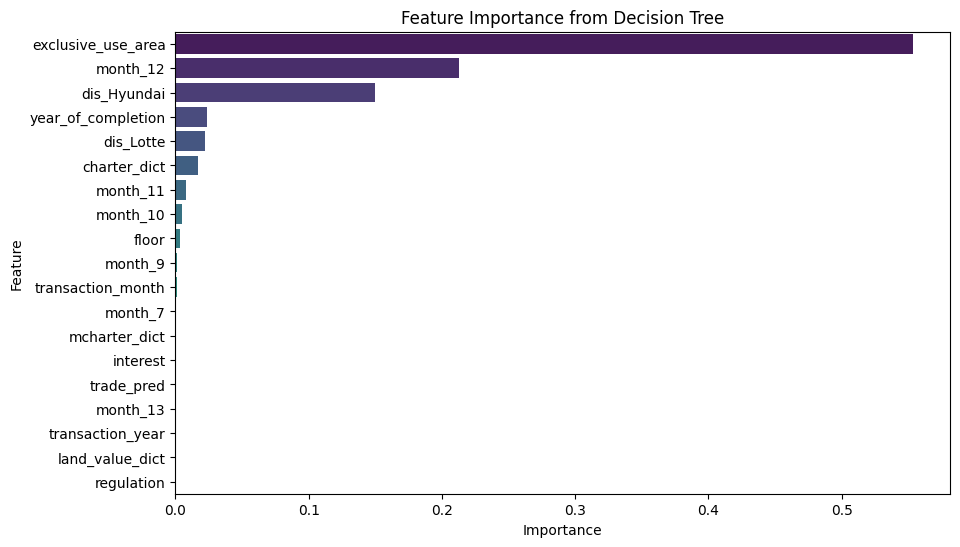

In [ ]:
# 변수 중요도 추출
feature_importances = dt_model.feature_importances_

# 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Decision Tree')
plt.show()

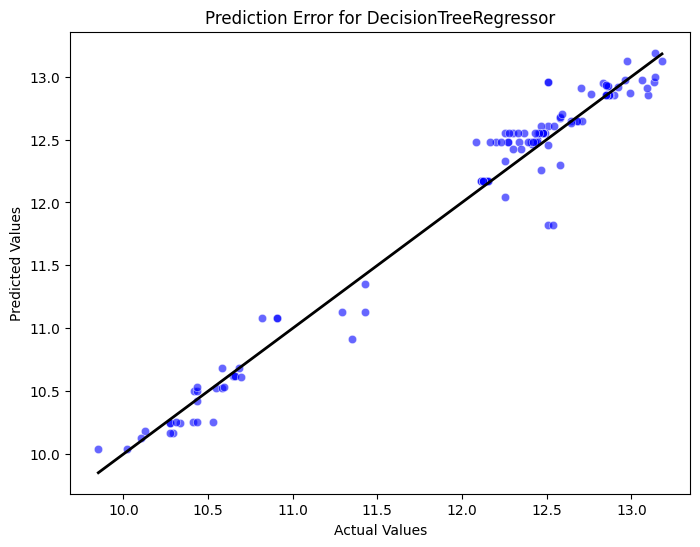

In [ ]:
# 예측값 vs 실제값 플롯
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=dt_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error for DecisionTreeRegressor')
plt.show()

In [ ]:
# 2. KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [ ]:
# MAE
mae = mean_absolute_error(y_test, knn_pred)
print(f"KNN MAE: {mae}")

KNN MAE: 0.3112778618851109


In [ ]:
# RMSE
RMSE_knn = mean_squared_error(y_test, knn_pred)**0.5
print(f"KNN RMSE: {RMSE_knn}")

KNN RMSE: 0.4357481266771983


In [ ]:
# R²
R2_knn = r2_score(y_test, knn_pred)
print(f"KNN R-squared (R²): {R2_knn}")

KNN R-squared (R²): 0.7886711522218388


In [ ]:
# 3. SVM Regressor
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
# MAE
mae = mean_absolute_error(y_test, svm_pred)
print(f"SVM MAE: {mae}")

SVM MAE: 0.8438219872998923


In [ ]:
# RMSE
RMSE_svm = mean_squared_error(y_test, svm_pred)**0.5
print(f"SVM RMSE: {RMSE_svm}")

SVM RMSE: 0.9544664313755538


In [ ]:
# R²
R2_svm = r2_score(y_test, svm_pred)
print(f"SVM R-squared (R²): {R2_svm}")

SVM R-squared (R²): -0.013932503536738805


In [ ]:
# 4. LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# MAE
mae = mean_absolute_error(y_test, lr_pred)
print(f"LinearRegression MAE: {mae}")

LinearRegression MAE: 0.4066540970008224


In [ ]:
# RMSE
RMSE_lr = mean_squared_error(y_test, lr_pred)**0.5
print(f"LinearRegression RMSE: {RMSE_lr}")

LinearRegression RMSE: 0.5454984772346341


In [ ]:
# R²
R2_lr = r2_score(y_test, lr_pred)
print(f"R-squared (R²): {R2_lr}")

R-squared (R²): 0.6688118319380606


In [ ]:
# 가장 성능이 좋았던 모델인 decision tree로 test target 예측
dt_pred = dt_model.predict(test)
# 로그 변환 값을 풀어줌
dt_pred_t = np.expm1(dt_pred)

In [ ]:
test['transaction_real_price'] = dt_pred_t
test.head()

,transaction_year,transaction_month,exclusive_use_area,floor,year_of_completion,interest,dis_Lotte,dis_Hyundai,regulation,land_value_dict,charter_dict,mcharter_dict,month_7,trade_pred,month_9,month_10,month_11,month_12,month_13,transaction_real_price
0,2023,4,77.97,2,2021,3.5,1.129633,0.661864,1,0.693,65173.088019,72.569959,18.769595,84.035337,30.653247,92.501014,84.002738,1639.746840,844.12265,306000.0
1,2023,4,59.99,2,2021,3.5,1.129633,0.661864,1,0.693,65173.088019,72.569959,18.769595,84.035337,30.653247,92.501014,84.002738,1639.746840,844.12265,306000.0
2,2023,1,84.81,3,1983,3.5,0.862774,1.833615,1,0.693,69488.025730,41.639701,6.847123,65.263070,21.356212,95.225854,89.238787,1693.437431,95.00000,450000.0
3,2023,1,84.81,9,1983,3.5,0.862774,1.833615,1,0.693,69488.025730,41.639701,6.847123,65.263070,21.356212,95.225854,89.238787,1693.437431,95.00000,450000.0
4,2023,2,84.81,5,1983,3.5,0.862774,1.833615,1,0.693,67244.682065,45.960481,15.085365,69.674531,26.999099,94.208321,86.581788,1673.653913,675.86909,450000.0


In [ ]:
# submission data에 실거래가 값 삽입
del submission['transaction_real_price']
submission['transaction_real_price'] = test['transaction_real_price']
submission.head()

,id,transaction_real_price
0,TEST_0000,306000.0
1,TEST_0001,306000.0
2,TEST_0002,450000.0
3,TEST_0003,450000.0
4,TEST_0004,450000.0


In [ ]:
max_value_row = train[train['transaction_real_price'] == max_value]
print(max_value_row)

      transaction_year  transaction_month  exclusive_use_area  floor  \
5697              2021                  4              151.31     25   

      year_of_completion  interest  dis_Lotte  dis_Hyundai  \
5697                2015       0.5    0.49558     1.515579   

      transaction_real_price regulation  land_value_dict  charter_dict  \
5697                  535000          1            6.014  71003.855712   

      mcharter_dict    month_7  trade_pred    month_9   month_10  month_11  \
5697     143.803834  10.818665  102.433478  82.900032  90.490089  92.79448   

      month_12  month_13  
5697  1486.852  58.66343  


In [ ]:
train.iloc[[5697]]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion
5697,TRAIN_5697,서울특별시 강남구 대치동,1027,래미안대치팰리스,151.31,202104,1,535000,25,2015


In [ ]:
max_value = train['floor'].max()
max_value

35